In [290]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns 
import random

# Part 1 Single Layer Perceptron 

In [472]:
n = 100 
mA = np.array([1.0, 0.5])
sigmaA = 0.35
mB = np.array([-1.0, 1.0])
sigmaB = 0.35 

classA = np.vstack((np.random.randn(1, 100) * sigmaA + mA[0], np.random.randn(1, 100) * sigmaA + mA[1], np.ones((1, 100))))
classB = np.vstack((np.random.randn(1, 100) * sigmaB + mB[0], np.random.randn(1, 100) * sigmaB + mB[1], np.ones((1, 100))))

print(classA.shape)
#classA

(3, 100)


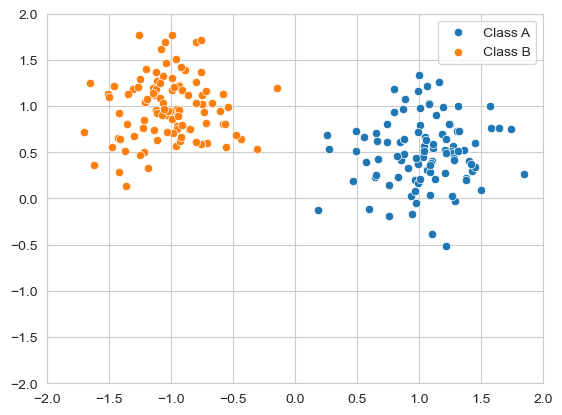

In [473]:
#matplotlib.pyplot.scatter(x=classA[0], y=classA[1], color="blue")
#matplotlib.pyplot.scatter(x=classB[0], y=classB[1], color="red")
sns.set_style("whitegrid")
sns.scatterplot(x=classA[0], y=classA[1], label="Class A")
splt = sns.scatterplot(x=classB[0], y=classB[1], label="Class B")
splt.set(xlim=(-2,2),ylim=(-2,2))
splt.legend()

## Analysis 

Lower sigma values lead to clustered data, which lead to increasing linear separatability.

mA\[0\] affects translation of data in the x axis 

mA\[1\] affects translation of data in the y axis 



In [474]:
# Random initialization of weights 
W = np.random.randn(1,3)

dataset = np.hstack((classA, classB))
label = np.hstack((np.ones((1,100)), np.full((1, 100), -1)))
dataset.shape 
#np.dot(W, classA)

(3, 200)

0.005

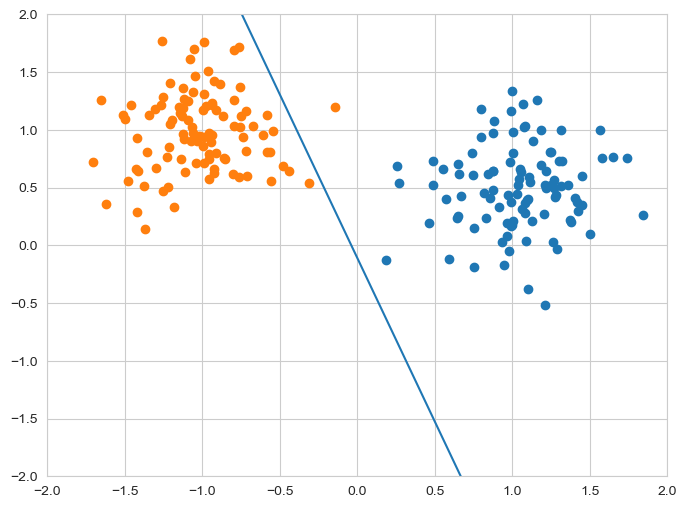

In [517]:
class NN:
    def __init__(self, dim:int, learning_rate: float, x: np.ndarray, label: np.ndarray, weights):
        self.weights = np.array(weights, copy=True)  
        self.dim = dim
        self.lr = learning_rate
        self.x = x
        self.label = label
        self.learning = []
        self.learning.append(self.get_ratio_error())
        
    def get_weights(self):
        return self.weights
        
    def get_learning(self) -> list:
        return self.learning
    
    def batch_error(self) -> np.ndarray:
        return -1 * self.lr * np.dot(np.dot(self.weights, self.x) - self.label, np.transpose(self.x))
    
    def sequential_error(self, index) -> np.ndarray:
        return -1 * self.lr * np.dot((np.dot(self.weights, self.x[:, index]) - self.label[:, index])[0], np.transpose(self.x[:, index]))
    
    def perceptron_error(self, index) -> np.ndarray:
        result = np.dot(self.weights, np.transpose(self.x[:, index]))
        result[result > 0] = 1
        result[result < 0] = -1
        if (result[0] - self.label[:, index])[0] != 0:
            return -self.lr * (result[0] - self.label[:, index])[0]/2 * self.x[:, index]
        else:
            return np.zeros(3)
    
    @staticmethod
    def threshold(weights, x_1):
        return (-weights[0][0] * x_1 - weights[0][2]) / weights[0][1]
    
    def get_ratio_error(self) -> int:
        #Wrong classification will be zero 
        result = np.dot(self.weights, self.x) 
        result[result > 0] = 1
        result[result < 0] = -1
        #print(result)
        result = result + self.label
        return np.count_nonzero(result==0)/self.label.shape[1]
        
    def display_graph(self, plt):
        if self.lr == 0.001:
            plt.scatter(x=classA[0], y=classA[1])
            plt.scatter(x=classB[0], y=classB[1])
            
        plt.set_ylim(-2, 2)
        plt.set_xlim(-2, 2)
        
        xlim = plt.get_xlim()
        ylim = [self.threshold(self.weights, x1) for x1 in xlim]
        #print(ylim)
        plt.plot(xlim, ylim, label=f"lr={self.lr}")
        #splt.legend()
        
        #return splt
    
    def train_perceptron_learning(self, epoch: int) -> None:
        
        indexes = [i for i in range(self.x.shape[1])]
        for i in range(epoch):
            random.shuffle(indexes)
            for index in indexes:
                train_loss = self.perceptron_error(index)
                self.weights += train_loss 
            self.learning.append(self.get_ratio_error())
            if self.get_ratio_error() == 0:
                break

        
        #self.display_graph()
    
    def train_batch(self, epoch: int) -> None:
        
        for i in range(epoch):
            #Update weights
            train_loss = self.batch_error()
            self.weights = self.weights + train_loss
            self.learning.append(self.get_ratio_error())
            if self.get_ratio_error() == 0:
                break
        #self.display_graph()
        
    
    def train_sequential(self, epoch: int) -> None:
        
        indexes = [i for i in range(self.x.shape[1])]
        for i in range(epoch):
            random.shuffle(indexes)
            for index in indexes:
                train_loss = self.sequential_error(index)
                if np.isinf(train_loss).any():
                    continue
                self.weights += train_loss
                if self.get_ratio_error() == 0:
                    break 
            self.learning.append(self.get_ratio_error())
                
                
            if self.get_ratio_error() == 0:
                break            
        #self.display_graph()
        
            
t = NN(2, 0.001, dataset, label, np.random.randn(1, 2+1))
#t.train_batch(50)
#t.train_sequential(50)
t.train_perceptron_learning(50)
fig, axs = plt.subplots(1, 1, figsize=(8, 6))
#l = t.get_learning()
#print(l)
t.display_graph(axs)
t.get_ratio_error()

#t.batch_error()

# Perceptron Learning vs Sequential Learning

Graph of number of errors vs number of epochs

In [521]:
weights = np.random.randn(1, 2+1)
weights

array([[-3.26067866, -0.12176373, -2.23465922]])

Text(0.5, 1.0, 'Delta Rule, Sequential Learning')

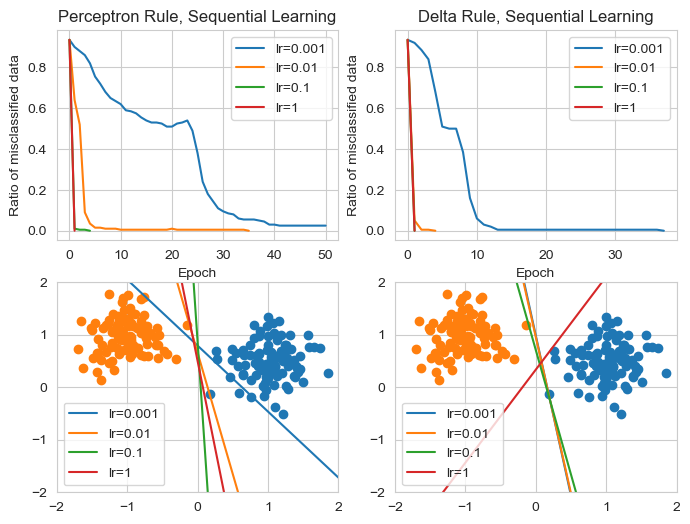

In [522]:
learning_rate = [0.001, 0.01, 0.1, 1]
#t = NN(2, 0.001, dataset, label)

fig, axs = plt.subplots(2, 2, figsize=(8, 6))
#plt.subplots_adjust(bottom=0.001)

# Perceptron Learning 
count = 0
for lr in learning_rate:
    t = NN(2, lr, dataset, label, weights)
    t.train_perceptron_learning(50)
    l = t.get_learning()
    #print(l, weights)
    
    axs[0, 0].plot([i for i in range(len(l))] , l, label=f"lr={lr}")
    axs[0, 0].set_xlabel("Epoch")
    axs[0, 0].set_ylabel("Ratio of misclassified data")
    count += 1
    t.display_graph(axs[1, 0])


# Sequential Learning
count = 0
for lr in learning_rate:
    t = NN(2, lr, dataset, label, weights)
    t.train_sequential(50)
    l = t.get_learning()
    #print(l, weights)
    
    axs[0, 1].plot([i for i in range(len(l))] , l, label=f"lr={lr}")
    axs[0, 1].set_xlabel("Epoch")
    axs[0, 1].set_ylabel("Ratio of misclassified data")
    count += 1
    t.display_graph(axs[1, 1])

axs[0,1].legend()    
axs[0,0].legend()
axs[1,1].legend()
axs[1,0].legend()

axs[0, 0].set_title("Perceptron Rule, Sequential Learning")
axs[0, 1].set_title("Delta Rule, Sequential Learning")



[0.935, 0.91, 0.89, 0.8, 0.575, 0.5, 0.5, 0.385, 0.135, 0.05, 0.025, 0.01, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.0] [[ 0.92170436  0.14742077 -0.14741594]]
[0.935, 0.04, 0.655, 0.405, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5] [[ 2.36113844e+17 -5.48338480e+17 -6.13214182e+17]]
[0.935, 0.05, 0.9, 0.21, 0.61, 0.475, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5] [[ 3.20896936e+74 -7.45234562e+74 -8.33405706e+74]]
[0.935, 0.05, 0.9, 0.195, 0.62, 0.47, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.

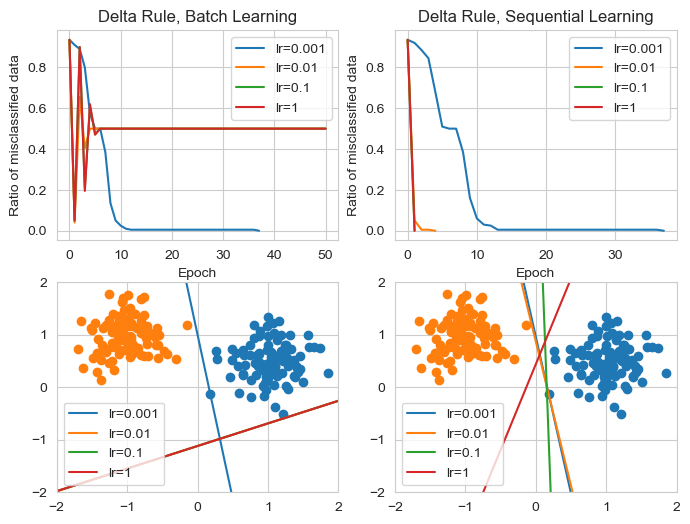

In [523]:
learning_rate = [0.001, 0.01, 0.1, 1]
#t = NN(2, 0.001, dataset, label)

fig, axs = plt.subplots(2, 2, figsize=(8, 6))
#plt.subplots_adjust(bottom=0.001)

# Perceptron Learning 
count = 0
for lr in learning_rate:
    t = NN(2, lr, dataset, label, weights)
    t.train_batch(50)
    l = t.get_learning()
    print(l, t.get_weights())
    
    axs[0, 0].plot([i for i in range(len(l))] , l, label=f"lr={lr}")
    axs[0, 0].set_xlabel("Epoch")
    axs[0, 0].set_ylabel("Ratio of misclassified data")
    count += 1
    t.display_graph(axs[1, 0])


# Sequential Learning
count = 0
for lr in learning_rate:
    t = NN(2, lr, dataset, label, weights)
    t.train_sequential(50)
    l = t.get_learning()
    #print(l, t.get_weights())
    
    axs[0, 1].plot([i for i in range(len(l))] , l, label=f"lr={lr}")
    axs[0, 1].set_xlabel("Epoch")
    axs[0, 1].set_ylabel("Ratio of misclassified data")
    count += 1
    t.display_graph(axs[1, 1])

axs[0,1].legend()    
axs[0,0].legend()
axs[1,1].legend()
axs[1,0].legend()

axs[0, 0].set_title("Delta Rule, Batch Learning")
axs[0, 1].set_title("Delta Rule, Sequential Learning")

print()

# NN no bias 

(2, 200)
[0.78, 0.785, 0.75, 0.71, 0.565, 0.425, 0.335, 0.315, 0.285, 0.28, 0.275, 0.275, 0.28, 0.28, 0.28, 0.285, 0.285, 0.28, 0.28, 0.28, 0.28, 0.28, 0.28, 0.28, 0.28, 0.28, 0.28, 0.28, 0.28, 0.28, 0.28, 0.28, 0.28, 0.28, 0.28, 0.28, 0.275, 0.275, 0.275, 0.275, 0.275, 0.275, 0.275, 0.275, 0.275, 0.275, 0.275, 0.275, 0.275, 0.28, 0.28]


Text(0.5, 1.0, 'Delta Rule, Batch Learning mA=(0,0) mB=(1,1)')

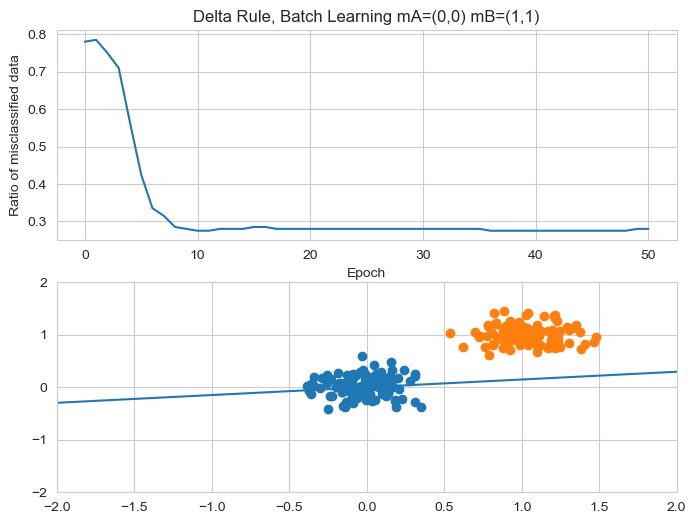

In [464]:
n = 100 
mA = np.array([0.0, 0.0])
sigmaA = 0.2
mB = np.array([1.0, 1.0])
sigmaB = 0.2 

classA = np.vstack((np.random.randn(1, 100) * sigmaA + mA[0], np.random.randn(1, 100) * sigmaA + mA[1]))
classB = np.vstack((np.random.randn(1, 100) * sigmaB + mB[0], np.random.randn(1, 100) * sigmaB + mB[1]))

dataset = np.hstack((classA, classB))
label = np.hstack((np.ones((1,100)), np.full((1, 100), -1)))

class NNNBIAS:
    def __init__(self, dim:int, learning_rate: float, x: np.ndarray, label: np.ndarray, weights):
        self.weights = np.array(weights, copy=True)  
        self.dim = dim
        self.lr = learning_rate
        self.x = x
        self.label = label
        self.learning = []
        self.learning.append(self.get_ratio_error())
        
    def get_weights(self):
        return self.weights
        
    def get_learning(self) -> list:
        return self.learning
    
    def batch_error(self) -> np.ndarray:
        return -1 * self.lr * np.dot(np.dot(self.weights, self.x) - self.label, np.transpose(self.x))
    
    def sequential_error(self, index) -> np.ndarray:
        return -1 * self.lr * np.dot((np.dot(self.weights, self.x[:, index]) - self.label[:, index])[0], np.transpose(self.x[:, index]))
    
    def perceptron_error(self, index) -> np.ndarray:
        result = np.dot((np.dot(self.weights, self.x[:, index]) - self.label[:, index])[0], np.transpose(self.x[:, index]))
        result[result > 0] = 1
        result[result < 0] = -1
        return -self.lr * (result - self.label[:, index]) / 2
    
    @staticmethod
    def threshold(weights, x_1):
        return (-weights[0][0] * x_1) / weights[0][1]
    
    def get_ratio_error(self) -> int:
        #Wrong classification will be zero 
        result = np.dot(self.weights, self.x) 
        
        result[result > 0] = 1
        result[result < 0] = -1
        #print(result)
        result = result + self.label
        return np.count_nonzero(result==0)/self.label.shape[1]
        
    def display_graph(self, plt):
        if self.lr == 0.001:
            plt.scatter(x=classA[0], y=classA[1])
            plt.scatter(x=classB[0], y=classB[1])
            
        plt.set_ylim(-2, 2)
        plt.set_xlim(-2, 2)
        
        xlim = plt.get_xlim()
        ylim = [self.threshold(self.weights, x1) for x1 in xlim]
        #print(ylim)
        plt.plot(xlim, ylim, label=f"lr={self.lr}")
        #splt.legend()
        
        #return splt
    
    def train_perceptron_learning(self, epoch: int) -> None:
        
        indexes = [i for i in range(self.x.shape[1])]
        for i in range(epoch):
            random.shuffle(indexes)
            for index in indexes:
                train_loss = self.perceptron_error(index)
                self.weights += train_loss 
            self.learning.append(self.get_ratio_error())
            if self.get_ratio_error() == 0:
                break

        
        #self.display_graph()
    
    def train_batch(self, epoch: int) -> None:
        
        for i in range(epoch):
            #Update weights
            train_loss = self.batch_error()
            self.weights = self.weights + train_loss
            self.learning.append(self.get_ratio_error())
            if self.get_ratio_error() == 0:
                break
        #self.display_graph()
        
    
    def train_sequential(self, epoch: int) -> None:
        
        indexes = [i for i in range(self.x.shape[1])]
        for i in range(epoch):
            random.shuffle(indexes)
            for index in indexes:
                train_loss = self.sequential_error(index)
                if np.isinf(train_loss).any():
                    continue
                self.weights += train_loss
                if self.get_ratio_error() == 0:
                    break 
            self.learning.append(self.get_ratio_error())
                
                
            if self.get_ratio_error() == 0:
                break            
        #self.display_graph()
print(dataset.shape)       
t = NNNBIAS(2, 0.001, dataset, label, np.random.randn(1, 2))
#t.train_batch(50)
t.train_sequential(50)
#t.train_perceptron_learning(50)
fig, axs = plt.subplots(2, 1, figsize=(8, 6))
l = t.get_learning()
print(l)
t.display_graph(axs[1])
t.get_ratio_error()
l = t.get_learning()
#print(l, t.get_weights())

axs[0].plot([i for i in range(len(l))] , l, label=f"lr={lr}")
axs[0].set_xlabel("Epoch")
axs[0].set_ylabel("Ratio of misclassified data")
axs[0].set_title("Delta Rule, Batch Learning mA=(0,0) mB=(1,1)")

#t.batch_error()

[0.355, 0.0]


Text(0.5, 1.0, 'Delta Rule, Batch Learning mA=(-1,-1) mB=(1,1)')

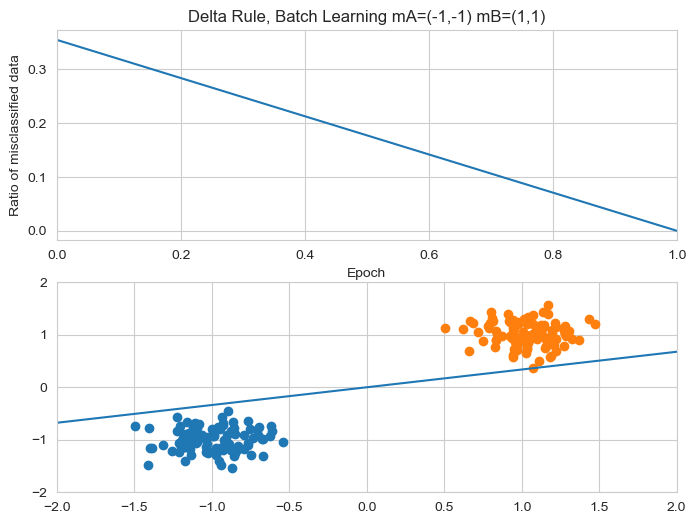

In [467]:
n = 100 
mA = np.array([-1.0, -1.0])
sigmaA = 0.2
mB = np.array([1.0, 1.0])
sigmaB = 0.2 

classA = np.vstack((np.random.randn(1, 100) * sigmaA + mA[0], np.random.randn(1, 100) * sigmaA + mA[1]))
classB = np.vstack((np.random.randn(1, 100) * sigmaB + mB[0], np.random.randn(1, 100) * sigmaB + mB[1]))

dataset = np.hstack((classA, classB))
label = np.hstack((np.ones((1,100)), np.full((1, 100), -1)))
t = NNNBIAS(2, 0.001, dataset, label, np.random.randn(1, 2))
#t.train_batch(50)
t.train_sequential(50)
#t.train_perceptron_learning(50)
fig, axs = plt.subplots(2, 1, figsize=(8, 6))
l = t.get_learning()
print(l)
t.display_graph(axs[1])
t.get_ratio_error()
l = t.get_learning()
#print(l, t.get_weights())
axs[0].set_xlim(0,1)
axs[0].plot([i for i in range(len(l))] , l, label=f"lr={lr}")
axs[0].set_xlabel("Epoch")
axs[0].set_ylabel("Ratio of misclassified data")
axs[0].set_title("Delta Rule, Batch Learning mA=(-1,-1) mB=(1,1)")